In [18]:
from d2l import torch as d2l
import torch
import random

生成数据集

torch.Size([1000, 2]) torch.Size([1000, 1])


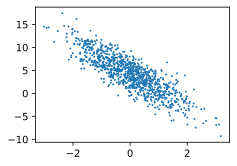

In [17]:
true_w=torch.tensor([2,-3.4])
true_b=4.2
features, labels=d2l.synthetic_data(true_w,true_b,1000)
print(features.shape,labels.shape)
d2l.set_figsize()
d2l.plt.scatter(features[:,1],labels,1)
d2l.plt.show()

## 从零实现

生成数据批量

In [19]:
def data_iter(batch_size, features, labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

定义模型

In [21]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

定义损失函数

In [23]:
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape)).norm()

定义优化算法

In [24]:
def sgd(params, lr, batch_size):
    
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

训练

In [39]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1, requires_grad=True)

lr=0.03
num_epochs=15
batch_size=10
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 152.935196
epoch 2, loss 123.339500
epoch 3, loss 93.649773
epoch 4, loss 64.170715
epoch 5, loss 34.540497
epoch 6, loss 5.107213
epoch 7, loss 0.398509
epoch 8, loss 0.333078
epoch 9, loss 0.323769
epoch 10, loss 0.361340
epoch 11, loss 0.389847
epoch 12, loss 0.345865
epoch 13, loss 0.327672
epoch 14, loss 0.321122
epoch 15, loss 0.333572


In [40]:
w,true_w,b,true_b

(tensor([[ 2.0009],
         [-3.3967]], requires_grad=True),
 tensor([ 2.0000, -3.4000]),
 tensor([4.2002], requires_grad=True),
 4.2)

## 使用框架实现

生成数据批量

In [49]:
from torch.utils import data

def load_array(data_arrays, batch_size, is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size=10
data_iter=load_array((features,labels),batch_size)

In [43]:
next(iter(data_iter))

[tensor([[ 0.6209, -2.2182],
         [-0.5524,  1.0444],
         [ 0.3826, -0.7264],
         [ 0.8849, -0.1185],
         [ 1.7858,  0.7406],
         [ 0.8538,  0.0161],
         [-0.5548,  0.1359],
         [-0.6860, -1.1594],
         [-1.5808, -1.2279],
         [-1.0347,  0.4629]]),
 tensor([[12.9878],
         [-0.4337],
         [ 7.4337],
         [ 6.3635],
         [ 5.2449],
         [ 5.8524],
         [ 2.6131],
         [ 6.7720],
         [ 5.2112],
         [ 0.5648]])]

定义模型

In [44]:
from torch import nn

net=nn.Sequential(nn.Linear(2,1)) # 输入维度2，输出维度1

定义损失函数

In [45]:
loss=nn.MSELoss()

定义优化算法

In [46]:
trainer=torch.optim.SGD(net.parameters(), lr=0.03)

训练

In [56]:
# 初始化参数
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

num_epochs=3
for epoch in range(num_epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000229
epoch 2, loss 0.000100
epoch 3, loss 0.000100


In [59]:
net[0].weight.data,true_w,net[0].bias.data,true_b

(tensor([[ 1.9995, -3.3998]]),
 tensor([ 2.0000, -3.4000]),
 tensor([4.2005]),
 4.2)